In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy import signal
import h5py, time
import sys
from iminuit import Minuit, describe


In [13]:
sys.path.append('/home/nadavp/new_trap/PythonScripts/') # is this already updated and we can use the one from tools?
import BeadDataFile

In [14]:
fname = r"/data/new_trap/20190715/NoBead/X350_Y200.h5"  # load a test data file 
bd = BeadDataFile.BeadDataFile(fname)
time = np.arange(0,len(bd.quad_sum)-1,1) # make time for the entire data set
time_sub = np.arange(3501,4000) # make time for a subset, for cross check

In [15]:
check = [] # list for the P(t+1)-P(t)
subset = [] # for the subset cross check
for i in range(0,len(bd.quad_sum)-1): # loop through the data set and calculate
    check.append(bd.quad_sum[i+1]-bd.quad_sum[i])
    if(i>3500 and i<4000): # the first peak extracted
        subset.append(bd.quad_sum[i+1]-bd.quad_sum[i])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in int_scalars
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in int_scalars
  


In [22]:
# EXAMPLE 1: Specific

# definition of a gaussian
def gaussian(x,area,mean,sigma,constant):
    norm = (1/((1/2*sigma)*np.sqrt(np.pi * 2)))
    return area * norm * np.exp(-(np.subtract(x,mean)**2/(2*sigma**2)))+constant

# definition of the cost function to minimize, examplary chisquare
def chisquare_1d(area,mean,sigma,constant):
    return np.sum(np.power(np.divide(np.subtract(gaussian(data_x,area,mean,sigma,constant),data_y),data_y_error),2))



# EXAMPLE 2: Generic 

def gaussian(x,params=list):
    norm = (1/((1/2*params[2])*np.sqrt(np.pi * 2)))
    return params[0] * norm * np.exp(-(np.subtract(x,params[1])**2/(2*params[2]**2)))+params[3]

def chisquare_1d(function, functionparams, data_x, data_y,data_y_error):
    chisquarevalue=np.sum(np.power(np.divide(np.subtract(function(data_x,functionparams),data_y),data_y_error),2))
    ndf = len(data_y)-len(functionparams)
    return (chisquarevalue, ndf)


In [55]:
data_x = time_sub # give x data
data_y = subset # give y data 
data_y_error = np.sqrt(np.abs(subset)) # give y uncertainty

In [56]:
m=Minuit(chisquare_1d, 
         area = 410e7, # set start parameter
         #limit_area= (limit_lower,limit_upper) # if you want to limit things
         #fix_area = "True", # you can also fix it
         mean = 3650,
         #fix_mean = "True",
         limit_mean = (3500,4500),
         sigma = 150,
         constant = 0,
         #fix_constant=0,
         errordef = 1,
         print_level=1)
print('Now proceed with the fit.')
m.migrad(ncall=500000)
#m.minos(), if you need fancy mapping


Now proceed with the fit.
------------------------------------------------------------------
| FCN = 9.85E+08                |     Ncalls=344 (344 total)     |
| EDM = 6.12E-06 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: InitialParamWarning: Parameter area is floating but does not have initial step size. Assume 1.
  if sys.path[0] == '':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: InitialParamWarning: Parameter mean is floating but does not have initial step size. Assume 1.
  if sys.path[0] == '':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: InitialParamWarning: Parameter sigma is floating but does not have initial step size. Assume 1.
  if sys.path[0] == '':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: InitialParamWarning: Parameter constant is floating but does not have initial step size. Assume 1.
  if sys.path[0] == '':


------------------------------------------------------------------
| FCN = 9.85E+08                |     Ncalls=344 (344 total)     |
| EDM = 6.12E-06 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
----------------------------------------------------------------------------------------------
|   | Name     |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
----------------------------------------------------------------------------------------------
| 0 | area     |  1.606E9  |  0.000E9  |            |            |         |         |       |
| 1 | mean     |  0.377E4  |  0.000E4  |            |            |  3500   |  4500   |       |
| 2 | sigma    |  2.930E1  |  0.000E1  |            |            |         |         |       |
| 3 | constant | -1.046E4  |  0.001E4  |            |            |         |         |       |
----------------------------------------------------------------------------------------------

(3500, 4000)

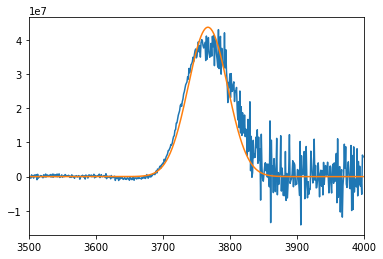

In [57]:
plt.plot(time_sub,subset)
plt.plot(time_sub,gaussian(time_sub,m.values["area"],m.values["mean"],m.values["sigma"],m.values["constant"]))
plt.xlim(3500,4000)

(3500, 4000)

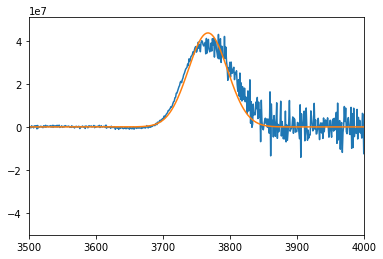

In [50]:
plt.plot(time,check)
plt.plot(time,gaussian(time,m.values["area"],m.values["mean"],m.values["sigma"],m.values["constant"]))
plt.xlim(3500,4000)

(array([3767.26890948, 3767.26896373, 3767.26901798, 3767.26907223,
        3767.26912648, 3767.26918072, 3767.26923497, 3767.26928922,
        3767.26934347, 3767.26939771, 3767.26945196, 3767.26950621,
        3767.26956046, 3767.2696147 , 3767.26966895, 3767.2697232 ,
        3767.26977745, 3767.26983169, 3767.26988594, 3767.26994019,
        3767.26999444, 3767.27004869, 3767.27010293, 3767.27015718,
        3767.27021143, 3767.27026568, 3767.27031992, 3767.27037417,
        3767.27042842, 3767.27048267, 3767.27053691, 3767.27059116,
        3767.27064541, 3767.27069966, 3767.2707539 , 3767.27080815,
        3767.2708624 , 3767.27091665, 3767.2709709 , 3767.27102514,
        3767.27107939, 3767.27113364, 3767.27118789, 3767.27124213,
        3767.27129638, 3767.27135063, 3767.27140488, 3767.27145912,
        3767.27151337, 3767.27156762, 3767.27162187, 3767.27167612,
        3767.27173036, 3767.27178461, 3767.27183886, 3767.27189311,
        3767.27194735, 3767.2720016 , 3767.27205

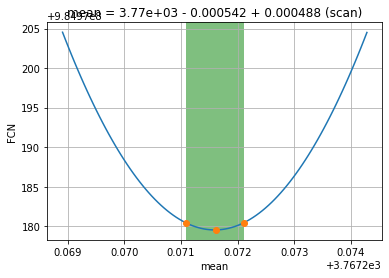

In [58]:
m.draw_mnprofile('mean',bound = 5, bins = 100)